# Árvores de decisão

## Importação das bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [31]:
load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## Transformando em dataframe

In [2]:
data = load_iris()

iris = pd.DataFrame(data.data)
iris.columns = data.feature_names
iris['target'] = data.target

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Separando os dados

In [33]:
# Podemos analisar quais os targets que o nosso dataset possui
iris.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [50]:
# Aqui ja vemos que temos tres valores de target.
# Vamos simplificar para trabalhar primeiramente somente com dois valores (0 e 1)
# Vamos tambem selecionar apenas duas colunas de atributos para simplificar o estudo
irisl = iris.loc[iris.target.isin([0,1]),['petal length (cm)', 'petal width (cm)', 'target']]
irisl

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
95,4.2,1.2,1
96,4.2,1.3,1
97,4.3,1.3,1
98,3.0,1.1,1


In [54]:
# Separando em X e y 
X = irisl.drop('target', axis=1)
y = irisl.target

In [56]:
# Separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

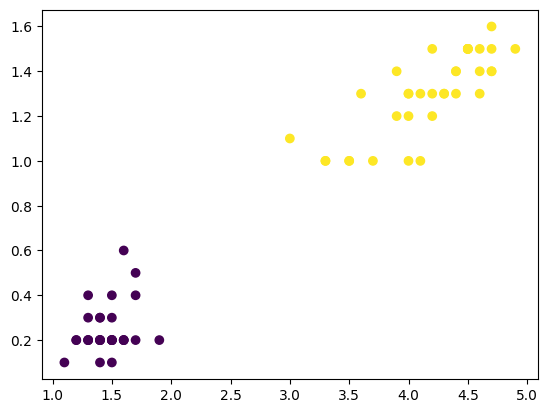

In [62]:
# Visualizando os dados de treino
fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'],
           X_train['petal width (cm)'],
           c=y_train)

plt.show()

## Criando a árvore de decisão


In [64]:
# Criando o classificador
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [65]:
# Verificando o score
# O quanto o classificador está se ajustando aos dados de treino (está sabendo separar bem os dados)
clf.score(X_train,y_train)

1.0

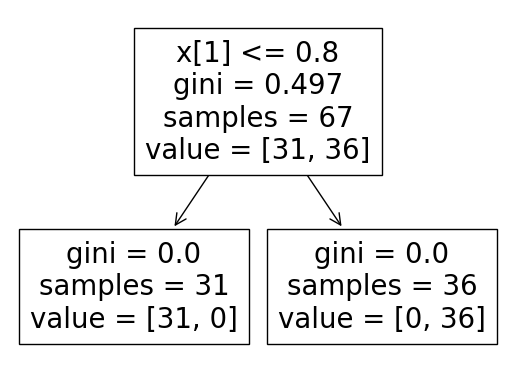

In [66]:
# Visualizando as regras criadas

fig, ax = plt.subplots()
tree.plot_tree(clf)

plt.show()

In [68]:
# Visualizando no gráfico
X_train.head()

,petal length (cm),petal width (cm)
28,1.4,0.2
93,3.3,1.0
5,1.7,0.4
66,4.5,1.5
65,4.4,1.4


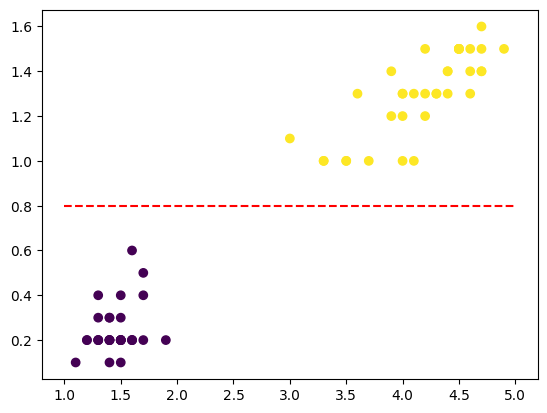

In [69]:
fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'],
           X_train['petal width (cm)'],
           c=y_train)

ax.plot([1,5],[0.8,0.8], '--r')

plt.show()

## Fazendo a previsão e avaliando o erro

In [72]:
y_pred = clf.predict(X_test)

# Matriz de confusão
confusion_matrix(y_test, y_pred)

array([[19,  0],
       [ 0, 14]])

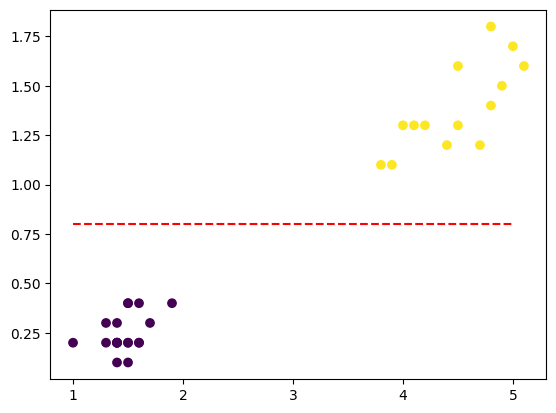

In [73]:
# Visualizando esses dados de teste no gráfico acima

fig, ax = plt.subplots()

ax.scatter(X_test['petal length (cm)'],
           X_test['petal width (cm)'],
           c=y_test)

ax.plot([1,5],[0.8,0.8], '--r')

plt.show()